#  Advertising Data 

### Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Read a data

In [2]:
df = pd.read_csv(r"E:\Data Science\1\Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


### Understand the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [5]:
df.shape

(200, 4)

In [6]:
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [7]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [9]:
df['Total_Sales'] = df["TV"]+df["radio"]+df["newspaper"]

In [10]:
df

,TV,radio,newspaper,sales,Total_Sales
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,55.7
196,94.2,4.9,8.1,9.7,107.2
197,177.0,9.3,6.4,12.8,192.7
198,283.6,42.0,66.2,25.5,391.8


In [11]:
df.drop(columns=['TV','newspaper','radio'], inplace=True)

In [12]:
df

,sales,Total_Sales
0,22.1,337.1
1,10.4,128.9
2,9.3,132.4
3,18.5,251.3
4,12.9,250.0
...,...,...
195,7.6,55.7
196,9.7,107.2
197,12.8,192.7
198,25.5,391.8


# EDA

### UniVariate

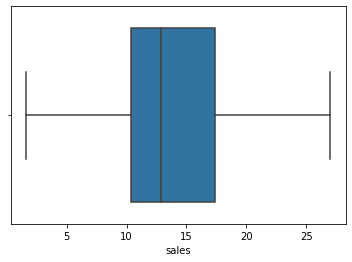

In [13]:
sns.boxplot(df['sales'])
plt.show()

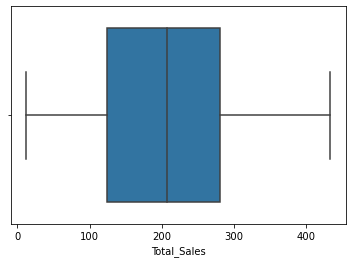

In [14]:
sns.boxplot(df['Total_Sales'])
plt.show()

### BiVariate

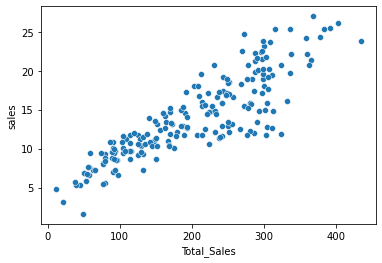

In [15]:
sns.scatterplot(data = df, x='Total_Sales',y='sales')
plt.show()

### MultiVariate

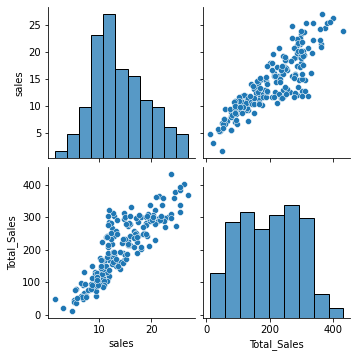

In [16]:
sns.pairplot(df)
plt.show()

In [17]:
df.corr()

,sales,Total_Sales
sales,1.000000,0.867712
Total_Sales,0.867712,1.000000


### Creating x and y Variable

In [18]:
x = df[['Total_Sales']]
y = df['sales']

In [19]:
x

,Total_Sales
0,337.1
1,128.9
2,132.4
3,251.3
4,250.0
...,...
195,55.7
196,107.2
197,192.7
198,391.8


In [20]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

# Split Train and Test

In [21]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3, random_state=7)

## Model Selection

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
model = LinearRegression()

In [24]:
model.fit(x_train,y_train)

LinearRegression()

In [25]:
x_train

,Total_Sales
88,187.2
58,298.1
113,240.9
149,91.1
36,315.7
...,...
151,178.1
67,164.0
25,285.9
196,107.2


In [26]:
y_train

88     12.9
58     23.8
113    15.9
149    10.1
36     25.4
       ... 
151    11.6
67     13.4
25     12.0
196     9.7
175    27.0
Name: sales, Length: 140, dtype: float64

In [27]:
model.intercept_

4.118266498176885

In [28]:
model.coef_

array([0.04970925])

# Predicting

In [29]:
train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

# Evaluation Metrics

In [30]:
train_res = y_train - train_pred
test_res = y_test - test_pred


In [31]:
model.score(x_train,y_train)

0.7433709560620307

In [32]:
model.score(x_test,y_test)

0.7626296044432747

In [33]:
from sklearn.metrics import r2_score

In [60]:
r2_score(y_test,test_pred)

0.7626296044432747